# Neural Networks

This notebook contains the exercises for the neural network slides. 

### Helper functions:

In [2]:

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import math

import matplotlib.pyplot as plt
print(tf.__version__)

def target_poly(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = (1/4.0) * (x[i]+4) * (x[i] + 1) * (x[i] - 2)
    return output

def target_poly_3(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = 2 * x[i]**3 + x[i]**2 - x[i] 
    return output

# polynomial with 8 roots
def target_poly_7(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = x[i]**7 + 4*x[i]**6 - 14*x[i]**5 - 56*x[i]**4 + 49*x[i]**3 + 196*x[i]**2 - 36*x[i] - 144
    return output

# a very high dimensional polygon
def target_poly_14(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = x[i]**14 - 0.97*x[i]**13 - 27.5669*x[i]**12 + 28.596911*x[i]**11 + 291.72658501*x[i]**10 - 322.8791018467*x[i]**9 - 1482.7415839005*x[i]**8 + 1741.757256169*x[i]**7 + 3643.0791581657*x[i]**6 - 4525.2996198175*x[i]**5 - 3566.980623085*x[i]**4 + 4745.7344671655*x[i]**3 + 263.42489522071*x[i]**2 - 614.82116925297+x[i] + 66.216725787218
    return output

def target_sine(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = math.sin(x[i])
    return output


def mother_wavelet(x):
    return (np.sin(2*np.pi*x) - np.sin(np.pi * x)) / np.pi * x


def plot_target(target_func):
    x = np.linspace(-3,3, 1000) 
    plt.plot(x,target_func(x), linestyle='--', color='C1', linewidth=2)
    
def combine_neurons(neurons, weights, bias, target_func):
    x = np.arange(-3, 3, 0.01)
    y = np.zeros((len(neurons[0])))
    plt.figure(figsize=(20,8))
    fig, ax = plt.subplots()
    for index in range(len(neurons)):
        y = y + neurons[index] * weights[index]
    y = y + bias
    y2 = target_func(x)
    plt.plot(x, y, label='ReLUs', linewidth=3)
    plt.plot(x, y2, label='Real Function', linestyle='--', color='C1', linewidth=2)
    
    mse = (np.sum((y - y2)**2)) / len(y)
    
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k', linewidth=0.75)
    ax.axvline(x=0, color='k', linewidth=0.75)
    plt.title("MSE = %f" % mse)
    
from tensorflow.keras.activations import relu
def neuron(w, b, plot=True):
    x = np.arange(-3, 3, 0.01)
    y = keras.activations.relu(x * w + b)
    if plot:
        fig, ax = plt.subplots()
        plt.ylim((-10, 10)) 
        ax.grid(True, which='both')
        plt.plot(x, y)
    return y


def approximate_NN(target_func, min_value=-10, max_value=10, epochs=50, hidden_layers=1, neurons_per_layer=8):
    # Create a NN with a single hidden layer to learn the polynomial function
    #
    model = keras.Sequential()
    for x in range(hidden_layers):
        model.add(Dense(neurons_per_layer, input_dim=1, activation='relu', use_bias=True)) 
    model.add(Dense(1,  use_bias=True)) # 1 Neuron

    sgd = Adam(lr=0.01) # set lower learning rate
    model.compile(sgd, loss='mean_squared_error')

    # Create some data
    #
    X = np.random.uniform(min_value, max_value, (50000,1))
    Y = target_func(X)

    model.fit(X,Y, epochs=epochs, batch_size=512);

    # Plot neural network
    #
    x_test = np.arange(min_value-np.abs(min_value*0.25), max_value+np.abs(max_value*0.25), 0.01)
    y_test_nn = model.predict(x_test)
    y_real = target_func(x_test)
    
    mse = np.sum((np.ravel(y_real) - np.ravel(y_test_nn))**2)
    
    plt.figure(figsize=(8,5))
    plt.axline((min_value, 0), (min_value,10), color="r", linestyle='dashed', linewidth=0.75)
    plt.axline((max_value, 0), (max_value,10), color="r", linestyle='dashed', linewidth=0.75)
    
    plt.plot(x_test, y_test_nn, label='Approximation using NN')
    plt.plot(x_test, y_real, linestyle ='-.', label='Real Function')
    plt.legend()
    
    return model

2.9.0


### Exercise 1:

Remember how the universal approximation theorems tell us that neural networks can basically approximate any function. 
In this exercise we will use the ```approximate_NN()``` to test this theorem. You can supply custom mathematical function to approximate using lambdas such as the call:

```python
approximate_NN(lambda x: 3*(x**2) + 6, -10, 10, epochs=50, hidden_layers=1, neurons_per_layer=32)
```

will try to approximate the function $f(x):=3x^2 + 6$ within the interval $[-10;10]$ using 50 epochs for training a single layer of hidden neurons with 32 neurons each.

I have also supplied you with some more complex functions (```target_poly```, ```target_poly3```,  ```target_poly7```, ```target_poly14```, ```mother_wavelet```).

Try to answer these questions:
* What is the effect of changing the number of neurons vs. the number of hidden layers?
* What is the effect of having very simple vs. more and more complex functions with regards the the required neurons/layers?
* Does more training (more epochs) automatically mean better result?
* Can you find a function that we can not approximate?
* What happens outside the interval we used for training (indicated by the red dashed lines in the plots)?   



    

Epoch 1/30
98/98 [==============================] - 3s 24ms/step - loss: nan
Epoch 2/30
98/98 [==============================] - 2s 25ms/step - loss: nan
Epoch 3/30
98/98 [==============================] - 2s 25ms/step - loss: nan
Epoch 4/30
98/98 [==============================] - 2s 24ms/step - loss: nan
Epoch 5/30
98/98 [==============================] - 2s 22ms/step - loss: nan
Epoch 6/30
98/98 [==============================] - 2s 23ms/step - loss: nan
Epoch 7/30
98/98 [==============================] - 2s 24ms/step - loss: nan
Epoch 8/30
98/98 [==============================] - 2s 24ms/step - loss: nan
Epoch 9/30
98/98 [==============================] - 2s 23ms/step - loss: nan
Epoch 10/30
98/98 [==============================] - 2s 24ms/step - loss: nan
Epoch 11/30
98/98 [==============================] - 2s 23ms/step - loss: nan
Epoch 12/30
98/98 [==============================] - 2s 24ms/step - loss: nan
Epoch 13/30
98/98 [==============================] - 2s 24ms/step - loss:

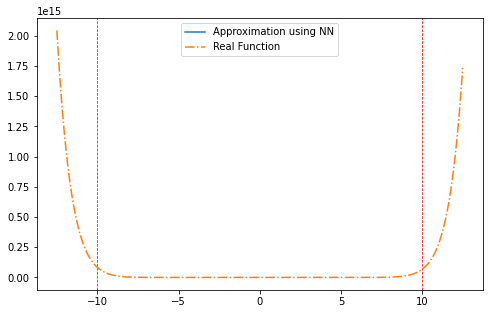

In [11]:
model = approximate_NN(target_poly_14, -10, 10, epochs=30, hidden_layers=20, neurons_per_layer=256)
model.summary()

Hidden Layers vs. Nr. Neurons
* For 32 neurons, loss was 0.79. For 128 neurons, loss was around 0.2. Meaning that the more neurons I have, the loss gets lower.
* When increasing the number of hidden layers (while keeping the nr. of neurons the same), the amount of parameters used for training gets higher. The loss does not decrease continously, but jumps from a higher to a lower loss and vice versa.

Simple vs. Complex target function:
* For 32 neurons and 10 hidden layers, we got a very good approximation for target_func_3 (simple case).
* For the same nr. of neurons and layers, we got a very bad approximation (only a linear function) for a complex function (mother_wavelet), meaning we got underfitting.

Impact of Nr. Epochs:
* No. Increasing the nr. of epochs does not automatically improve my results.
* It may even lead to overfitting if I have to many epochs

Find function we cannot approximate?
* No
* According to the UAT (Universal Approximate Theorem), we can approximate any continous function with a feed-forward nework using a single hidden layer (and mild assumptions on activation function)

Outside interval?
* We can only do predictions within an interval
* Outside an interval, we have no influence, so approx. is very bad. 


### Exercise 2:

In this exercise you are provided with a very simple neuron using a ReLU as activation function. You can supply the neurons parameters manually (the weight and bias term) as ```neuron(3, 2)``` will compute and plot all the output values generated by the neuron for all input values in an interval of $[-3;3]$. **Hint:** You can use the semi-colon in the call ```neuron(3, 2);``` to suppress the output. 


**Questions:**
* What is the effect of changing the weight?
* What is the effect of changing the bias?




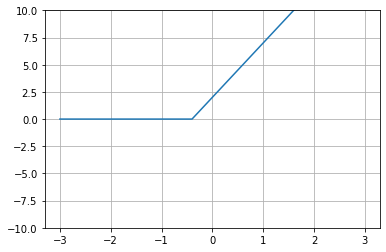

In [5]:
neuron(5,2);

The weight impacts the slope of the function. The slope changes proprotionally to the weight. The higher the weight, the steeper the function.
The bias determines at which point the funcition goes through the y-axis. A positive bias moves function horizontally to left.

### Exercise 3:

A mathematical function is linear iff $f(x)+f(y) = f(x+y)$ and $\lambda f(x) = f(\lambda x)$.

* Show that ReLU is not a linear function. 

ReLu f(x) = max(0, x)

#### First Rule
f(-2) + f(1) = f(-2 + 1)

0 + 1 = 0 --> wrong

#### Second Rule
(-3) * f(-1) = f((-3) * (-1))

(-3) * 0 = f(3)

0 = 3 --> wrong


### Exercise 4:

You saw that we can combine neurons to a neural network. Try to manually find the weights for approximating the ```target_poly_3``` function.  Use the ```combine_neurons``` function to combine multiple neurons. 

```python 
def combine_neurons(neurons, weights, bias, target_func):
    """ Parameters:
    neurons - a list of neurons such sa created by the neuron() function
    weights - a list of weights used by the output layer neuron
    bias - a single bias value used by the output layer neuron
    target_func - a function to plot as reference for approximation
    """
    
```

* Manually find the parameters of a neural network to approximate the ```target_poly_3``` function (*You can do this via trial and error, no calculations are necessary*).
* Try to find the parameters of a neural network to approximate the ```target_sine``` function (*this might be difficult*).
* Use the call to ```model = approximate_NN(...)``` to let tensorflow find the weights and biases for approximating the ```target_sine``` function. Have a look at ```model.layers[0].weights``` and ```model.layers[1].weights``` to help you find appropriate parameters for this problem. 

    

<Figure size 1440x576 with 0 Axes>

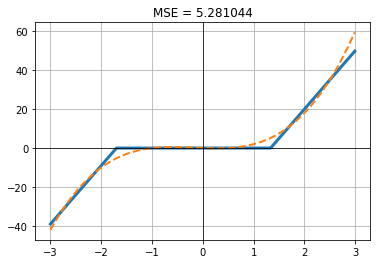

In [13]:

r1 = neuron(30, -40, False)
r2 = neuron(-30, -51, False)

combine_neurons([r1, r2,], [1, -1,], 0, target_poly_3)

<Figure size 1440x576 with 0 Axes>

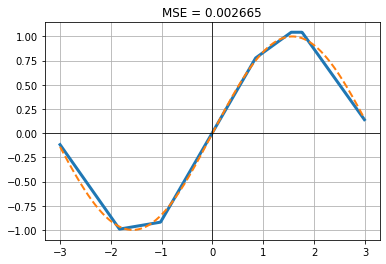

In [48]:
n1 = neuron(-0.33069903, 0.511848,False)
n2 = neuron(0.8296534, -1.4627434, False)
n3 = neuron(-0.4316989, 0.36551768, False)
n4 = neuron(-0.57583934, -1.0538672, False)
n5 = neuron(-0.73144996, -0.74761295, False)

combine_neurons([n1,n2,n3,n4, n5], [-1.1522008, -0.8876237, -1.2196454, 1.4507078, 1.1192176], 1.0434003, target_sine)

Epoch 1/30
98/98 [==============================] - 0s 871us/step - loss: 0.1308
Epoch 2/30
98/98 [==============================] - 0s 869us/step - loss: 0.0486
Epoch 3/30
98/98 [==============================] - 0s 825us/step - loss: 0.0310
Epoch 4/30
98/98 [==============================] - 0s 754us/step - loss: 0.0260
Epoch 5/30
98/98 [==============================] - 0s 720us/step - loss: 0.0231
Epoch 6/30
98/98 [==============================] - 0s 945us/step - loss: 0.0190
Epoch 7/30
98/98 [==============================] - 0s 884us/step - loss: 0.0144
Epoch 8/30
98/98 [==============================] - 0s 788us/step - loss: 0.0101
Epoch 9/30
98/98 [==============================] - 0s 803us/step - loss: 0.0070
Epoch 10/30
98/98 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 11/30
98/98 [==============================] - 0s 691us/step - loss: 0.0043
Epoch 12/30
98/98 [==============================] - 0s 714us/step - loss: 0.0039
Epoch 13/30
98/98 [========

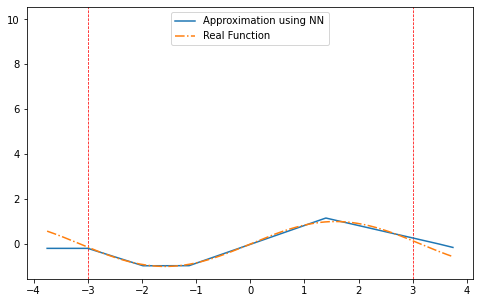

In [50]:
model = approximate_NN(target_sine, -3, 3, epochs=30, hidden_layers=1, neurons_per_layer=5)
print(model.layers[0].weights)
print(model.layers[1].weights)

## Exercise 5:

1. We have a network with 3 hidden layers. The amount of neurons in the first, second and third hidden layer is 10, 20 and 30. Each layer uses a bias term. The output layer contains 5 neurons and does not use a bias term. The input dimension of our data is 17. 

* Draw the architecture of this NN by hand and calculate the total number of parameters (weights+biases) 
* Implement the architecture in Keras and verify your result. 


![nn](NN_Ex05.jpg)

In [5]:

model = keras.Sequential()
model.add(Dense(10, input_dim=17, activation='relu', use_bias=True))
model.add(Dense(20, activation='relu', use_bias=True))
model.add(Dense(30, activation='relu', use_bias=True))
model.add(Dense(5, use_bias=False))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                180       
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 30)                630       
                                                                 
 dense_11 (Dense)            (None, 5)                 150       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


## Exercise 6: Stochastic Gradient Descent

In gradient descent we move along the negative gradient to find a minimum of a function. This is the way neural networks are trained today. I have supplied you with an implementation of gradient descent 
```SGD(func, start_value, xmin = -2.5, xmax = 2, learning_rate=0.1, iterations=10)```. I have also provided an interesting target polynomial ```target``` for you. 

* Try to find the minimum within the interval $[-2.5;2]$ of the target polynomial using ```SGD```.
* What is the impact of the learning rate (too high or too low) on the result?
* What is the impact of the number of iterations on the result?

Experiment with different start values and see how the algorithm performs depending on the chosen parameters for learning rate and iterations. 

In [20]:
# A very high dimensional polygon
def target(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = 0.001 * (x[i]**14 - 0.97*x[i]**13 - 27.5669*x[i]**12 + 28.596911*x[i]**11 + 291.72658501*x[i]**10 - 322.8791018467*x[i]**9 - 1482.7415839005*x[i]**8 + 1741.757256169*x[i]**7 + 3643.0791581657*x[i]**6 - 4525.2996198175*x[i]**5 - 3566.980623085*x[i]**4 + 4745.7344671655*x[i]**3 + 263.42489522071*x[i]**2 - 614.82116925297+x[i] + 66.216725787218)
    return output

def SGD(func, start_value, xmin = -2.5, xmax = 2, learning_rate=0.1, iterations=10):
    min_values = []

    min_values.append(start_value)
    min_value = start_value
    delta = 0.01
    diverge = False
    
    for i in range(iterations):
        # Compute approximative derivative numerically, usually we do this
        # with a correctly compute partial derivative
        f1 = func([min_value + delta])
        f2 = func([min_value - delta])
        derivative = (f1[0] - f2[0]) / (2*delta)
 
        # Move the opt_value along the derivative
        min_value = min_value - learning_rate * derivative
         
        # Check if we diverge to save the plot
        if min_value < xmin:
            diverge= True
            min_values.append(xmin)
            break
        if min_value > xmax:
            diverge= True
            min_values.append(xmax)
            break
            
        min_values.append(min_value)
        
    # For plotting only
    fig, ax = plt.subplots(figsize=(12,6))
    x = np.arange(xmin, xmax, 0.01)
    y = func(x)
    plt.plot(x, y)
    
    fm = func(min_values)
    plt.plot(min_values, fm, 'ro-')
    ax.grid(True, which='both')
    
    if diverge:
        plt.title('Optimization Diverged at: %f' % min_value)
    return min_value

-1.1297335145894016


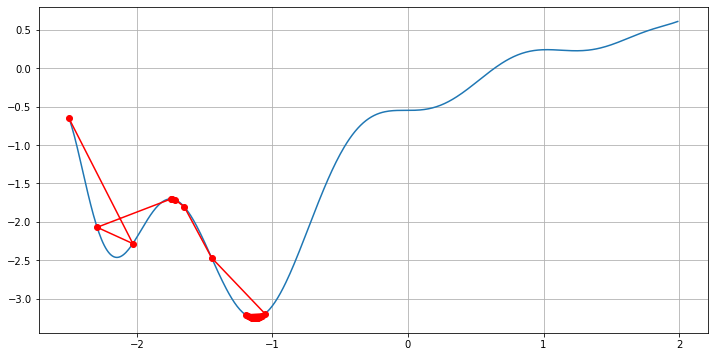

In [48]:
minVal = SGD(target, -2.5, iterations=40)
print(minVal)


Impact of Learning Rate:
* Too high (e.g 2) means we make big updates, but do reach only a really bad minimum
* Too low (e.g 0.0005) means we make only small update. If we start at a pretty bad spot (e.g. rather at a maximum), then we will not reach the optimal minimum (= get stuck at a saddle point or local minimum)


Impact of Nr. Iterations:
*

### Exercise 7: Stochastic Gradient Descent with Momentum

In gradient descent with momentumm we move along the negative gradient to find a minimum of a function but use our previous updates to skip over small bumps.I have supplied you with an implementation of gradient descent with momentum ```SGD_Momentum(func, start_value, xmin = -2.5, xmax = 2, learning_rate=0.1, momentum = 0.1, iterations=10)```. I have also provided an interesting target polynomial ```target``` for you. 

* Try to find the minimum within the interval $[-2.5;2]$ of the target polynomial using ```SGD with momentum```.
* What is the impact of the learning rate (too high or too low) on the result?
* What is the impact of the momentum (too high or too low) on the result?
* What is the impact of the number of iterations on the result?

Experiment with different start values and see how the algorithm performs depending on the chosen parameters for learning rate and iterations. 

In [ ]:
import math


def SGD_Momentum(func, start_value, xmin = -2.5, xmax = 2, learning_rate=0.1, momentum = 0.1, iterations=10):
    min_values = []

    min_values.append(start_value)
    min_value = start_value
    
    update_min_value = 0
    delta = 0.01
    diverge = False
    
    for i in range(iterations):
        # Compute approximative derivative numerically, usually we do this
        # with symbolically computed partial derivatives
        f1 = func([min_value + delta])
        f2 = func([min_value - delta])
        derivative = (f1[0] - f2[0]) / (2*delta)
 
        # Move the opt_value along the derivative with Momentum
        update_min_value = momentum * update_min_value - learning_rate * derivative
        min_value = min_value + update_min_value
        
        # Check if we diverge to save the plot
        if min_value < xmin:
            diverge= True
            min_values.append(xmin)
            break
        if min_value > xmax:
            diverge= True
            min_values.append(xmax)
            break
            
        min_values.append(min_value)   
        
        
    # For plotting only
    fig, ax = plt.subplots(figsize=(12,6))
    x = np.arange(xmin, xmax, 0.01)
    y = func(x)
    plt.plot(x, y)
    
    fm = func(min_values)
    plt.plot(min_values, fm, 'ro-')
    plt.plot(min_values[-1], fm[-1], 'go')
    plt.plot(min_values[0], fm[0], 'bo')
    ax.grid(True, which='both')
    
    if diverge:
        plt.title('Optimization Diverged at: %f' % min_value)
    return min_value

## Exercise 8

In this exercise your job is to create a neural network that allows us to classify the baseball dataset. The dataset is comprised of a bunch of statistics per player. Your job is to create a neural-network that is capable of predicting wether the player will be accepted into the hall of fame or not. 

* Load the baseball dataset using ```load_dataset(../data/baseball.pickle)```.
* Have a look at the dataset, there are multiple fields such as Attributes, Targets, Description, ...
* Create a neural network using ```keras``` to predict if a player will be accepted into the the hall-of-fame or not.
* Evaluate your model using appropriate cross-validation schemes. 

In [ ]:
# Download data
#
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/baseball.pickle -P ../data

#Imports, Helper Functions and Data Structures
#
import numpy as np
import pickle

from dataclasses import dataclass
def load_dataset(filename):
    with open(filename, 'rb') as fd:
        dataset = pickle.load(fd)
    return dataset

# Baseball dataset
#
@dataclass
class Dataset:
    Description: str
    Attributes: list()
    Targets: list()
    X: np.array
    Y: np.array

'wget' is not recognized as an internal or external command,
operable program or batch file.
